Aperçu des données :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies           

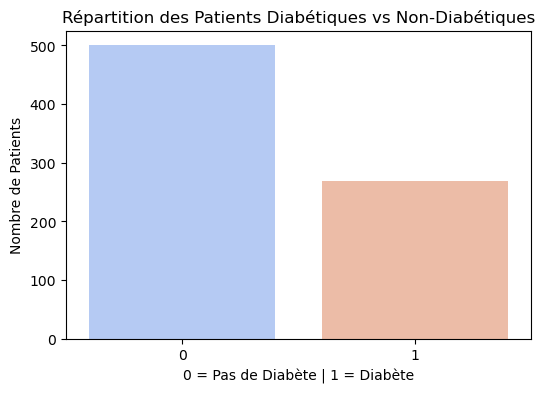

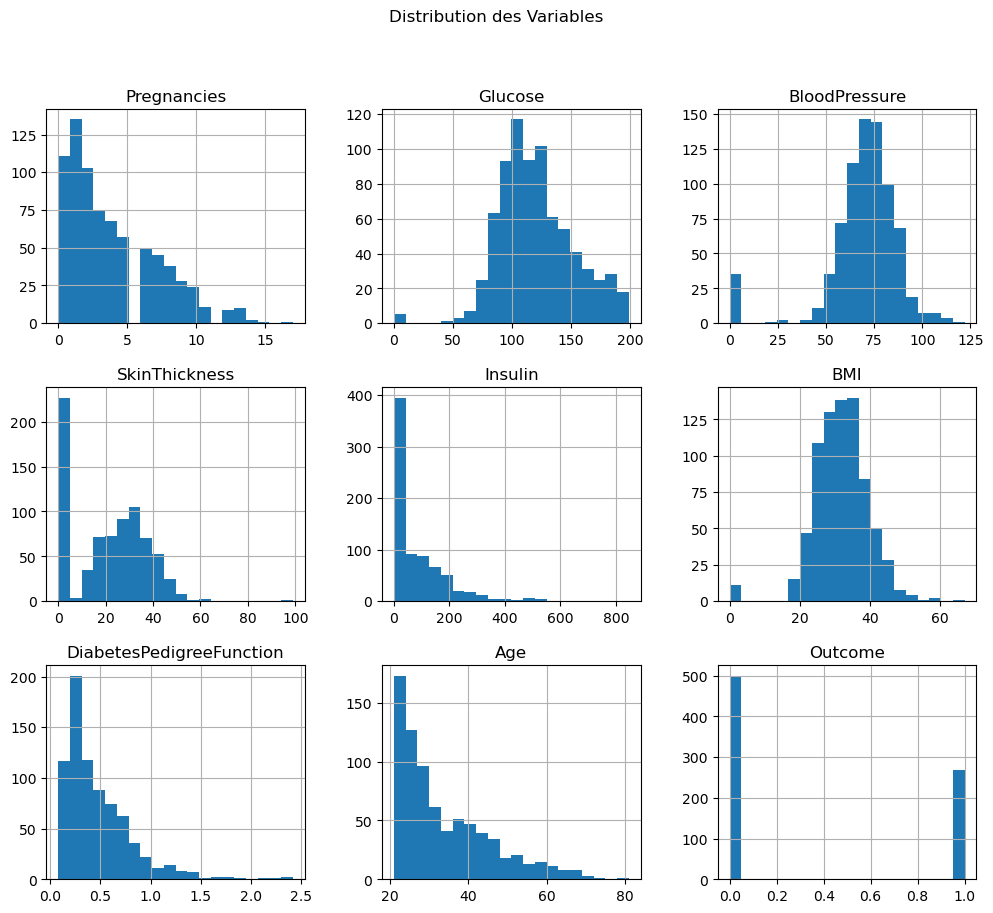

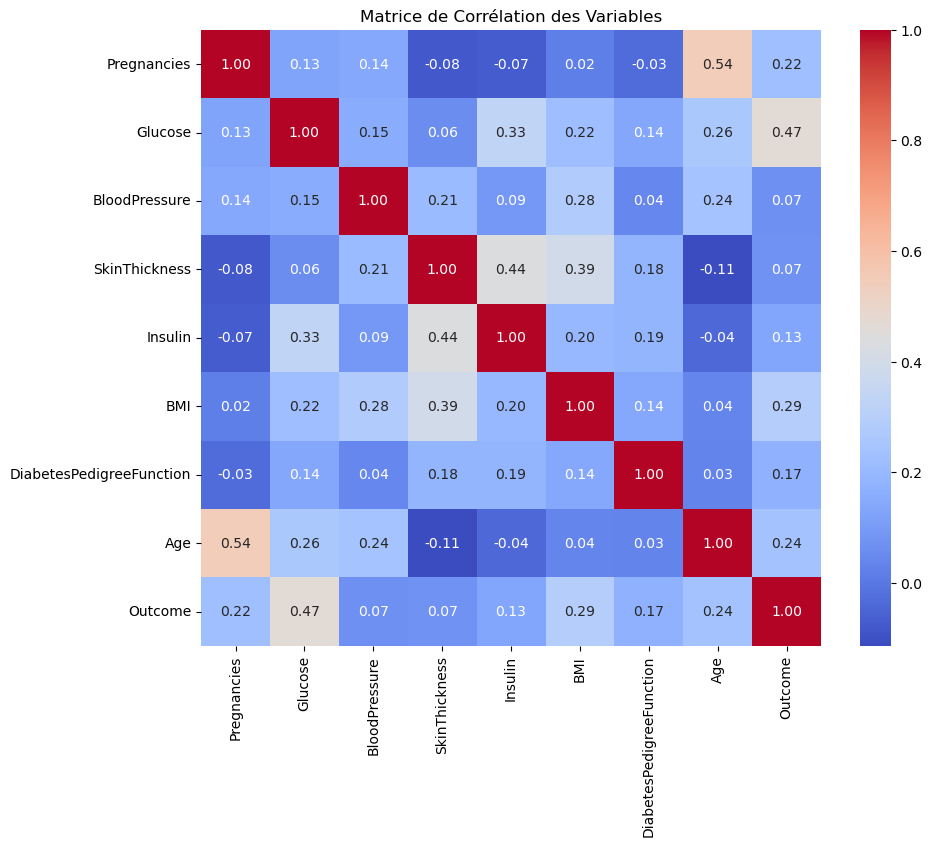

In [11]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv("diabetes.csv")  # Remplacez par le chemin de votre fichier si nécessaire

# Afficher les premières lignes du dataset
print("Aperçu des données :")
print(df.head())

# Vérifier la structure du dataset (nombre de lignes, colonnes, types de données)
print("\nInformations générales sur le dataset :")
print(df.info())

# Vérifier s'il y a des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Analyse des statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# Vérifier l’équilibre des classes (combien de patients ont le diabète et combien ne l’ont pas)
print("\nRépartition des classes :")
print(df['Outcome'].value_counts())

# Visualisation de la distribution des classes (patients diabétiques vs non-diabétiques)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Outcome", hue="Outcome", palette="coolwarm", legend=False)  # Correction ici
plt.title("Répartition des Patients Diabétiques vs Non-Diabétiques")
plt.xlabel("0 = Pas de Diabète | 1 = Diabète")
plt.ylabel("Nombre de Patients")
plt.show()


# Affichage des histogrammes pour voir la distribution des variables
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution des Variables")
plt.show()

# Vérification des corrélations entre les variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation des Variables")
plt.show()


Valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valeurs manquantes après correction des 0 :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Vérification après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


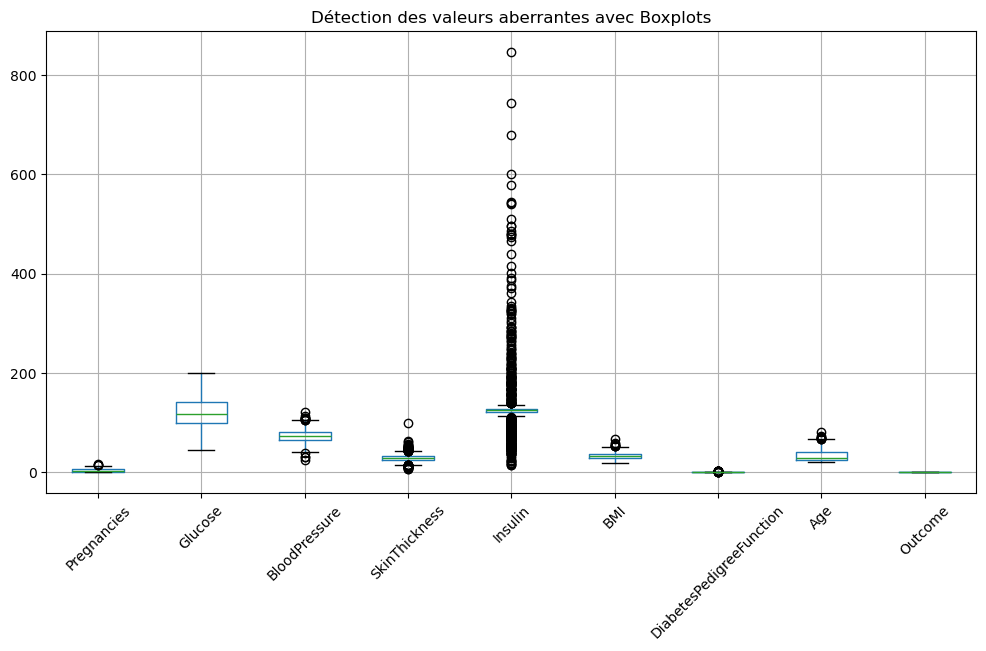


Statistiques après standardisation :
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.613650e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.0

In [12]:
# Importation des bibliothèques nécessaires
from sklearn.preprocessing import StandardScaler

# 1️⃣ Vérification des valeurs nulles
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# 🚨 Le dataset Pima n'a pas de valeurs nulles officiellement, mais certaines colonnes ont des valeurs 0
# qui sont biologiquement impossibles (ex : pression sanguine, taux de glucose ≠ 0)
# Nous allons considérer ces valeurs comme manquantes.

# Colonnes concernées (on remplace les 0 par NaN pour les traiter)
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_check] = df[cols_to_check].replace(0, np.nan)

# Vérifier les valeurs manquantes après remplacement des 0
print("\nValeurs manquantes après correction des 0 :")
print(df.isnull().sum())

# 2️⃣ Imputation des valeurs manquantes (remplacement par la médiane)
df.fillna(df.median(), inplace=True)

# Vérifier que toutes les valeurs sont maintenant complètes
print("\nVérification après imputation :")
print(df.isnull().sum())

# 3️⃣ Détection des valeurs aberrantes (outliers) avec boxplots
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes avec Boxplots")
plt.show()

# 4️⃣ Standardisation des données (important pour Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Outcome"]))  # On exclut la colonne cible

# Création d'un nouveau DataFrame standardisé
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])  # On remet les noms des colonnes
df_scaled["Outcome"] = df["Outcome"]  # On réintègre la colonne cible

# Vérification des nouvelles statistiques après standardisation
print("\nStatistiques après standardisation :")
print(df_scaled.describe())


Aperçu des données :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Taille du dataset avant nettoyage : 768 lignes
Taille du dataset après nettoyage : 639 lignes


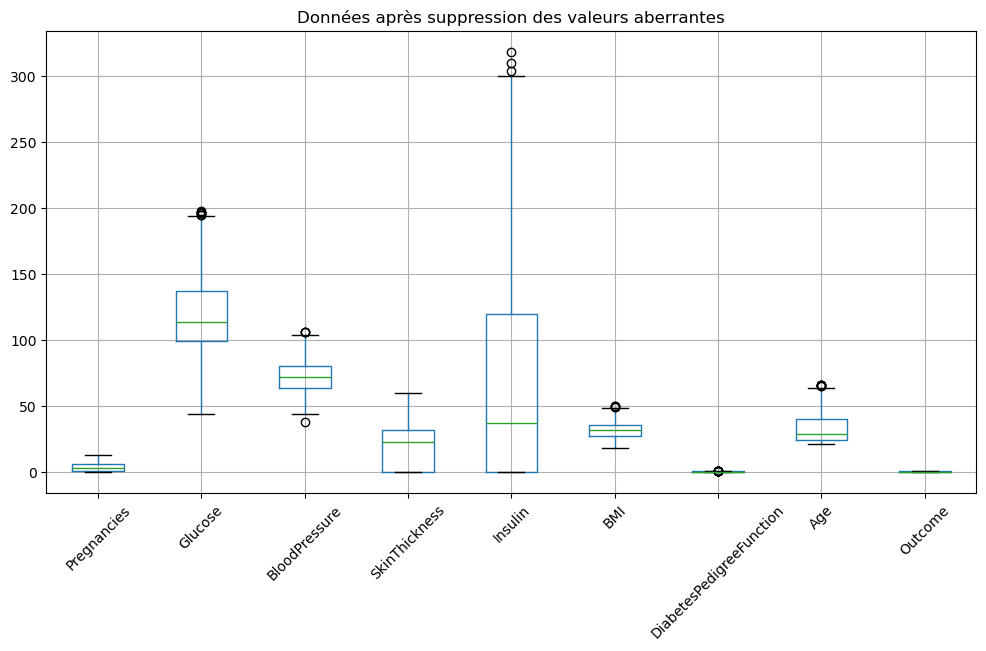

Dimensions de X : (639, 8), Dimensions de y : (639,)
Taille de X_train : (511, 8), Taille de X_test : (128, 8)
Meilleurs hyperparamètres : {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Quelques prédictions : [0 0 0 0 0 0 0 0 1 0]

🔹 Précision du modèle : 0.7500

📊 Rapport de Classification :
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        88
           1       0.63      0.47      0.54        40

    accuracy                           0.75       128
   macro avg       0.71      0.68      0.69       128
weighted avg       0.74      0.75      0.74       128



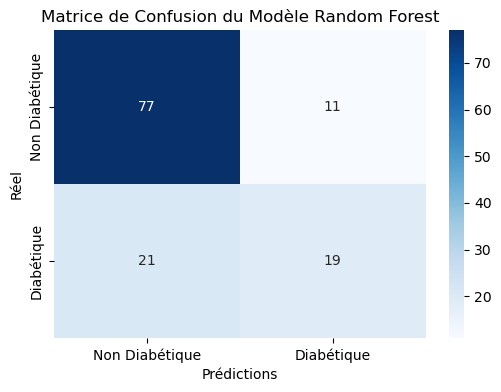

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger le dataset
file_path = "diabetes.csv"  # Remplace par le bon chemin si nécessaire
df = pd.read_csv(file_path)

# Vérifier les premières lignes
print("Aperçu des données :")
print(df.head())

# Suppression des valeurs aberrantes avec la méthode IQR (Interquartile Range)
cols_to_check = df.columns[:-1]  # Exclure la colonne cible "Outcome"
Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des outliers
df_cleaned = df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]

# Vérification après nettoyage
print(f"Taille du dataset avant nettoyage : {df.shape[0]} lignes")
print(f"Taille du dataset après nettoyage : {df_cleaned.shape[0]} lignes")

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned.drop(columns=["Outcome"]))
df_scaled = pd.DataFrame(X_scaled, columns=df_cleaned.columns[:-1])
df_scaled["Outcome"] = df_cleaned["Outcome"]

# Vérification des données après nettoyage
plt.figure(figsize=(12, 6))
df_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title("Données après suppression des valeurs aberrantes")
plt.show()

# Séparation des features et de la cible
X = df_cleaned.drop(columns=["Outcome"])
y = df_cleaned["Outcome"]

# Vérification des dimensions
print(f"Dimensions de X : {X.shape}, Dimensions de y : {y.shape}")

# Division du dataset en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des tailles après division
print(f"Taille de X_train : {X_train.shape}, Taille de X_test : {X_test.shape}")

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [10, 15, 20],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre min d'échantillons par feuille
}

# Création du modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres :", best_params)

# Entraînement du modèle avec les meilleurs paramètres
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = best_rf.predict(X_test)

# Vérification des prédictions
print("Quelques prédictions :", y_pred[:10])

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Précision du modèle : {accuracy:.4f}")

# Rapport de classification
print("\n📊 Rapport de Classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Non Diabétique", "Diabétique"], 
            yticklabels=["Non Diabétique", "Diabétique"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion du Modèle Random Forest")
plt.show()


In [13]:
import joblib  # Bibliothèque pour sauvegarder les modèles
from sklearn.ensemble import RandomForestClassifier

# 🏆 Exemple d'un modèle Random Forest entraîné
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)  # Entraîner le modèle avec tes données

# 💾 Sauvegarde du modèle au format .pkl
joblib.dump(model, "random_forest_model.pkl")

print("✅ Modèle sauvegardé sous 'random_forest_model.pkl' avec succès !")


✅ Modèle sauvegardé sous 'random_forest_model.pkl' avec succès !


In [14]:
# 📌 Prétraitement des Données et Création de diabetes_cleaned.csv

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 📂 Charger les données brutes (Assurez-vous que "diabetes.csv" est bien présent)
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# 🔍 Vérifier les premières lignes du dataset
print("📌 Aperçu des données brutes :")
print(df.head())

# ⚠️ Remplacement des valeurs 0 par NaN dans certaines colonnes médicales (0 est incohérent)
cols_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_replace:
    df[col] = df[col].replace(0, np.nan)

# 📌 Vérifier les valeurs manquantes après correction
print("\n📌 Valeurs manquantes après correction des 0 :")
print(df.isnull().sum())

# 📊 Imputation des valeurs manquantes par la médiane
df.fillna(df.median(), inplace=True)

# 📏 Normalisation des variables numériques (centrer-réduire)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_replace] = scaler.fit_transform(df[cols_to_replace])

# 💾 Sauvegarde du dataset prétraité
df_scaled.to_csv("diabetes_cleaned.csv", index=False)

print("\n✅ Fichier 'diabetes_cleaned.csv' sauvegardé avec succès !")


📌 Aperçu des données brutes :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

📌 Valeurs manquantes après correction des 0 :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Ag